# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [3]:
N = 8 # put your index here

In [4]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [2]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, eps = 1.0, min_pts = 2):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.min_pts = min_pts
        self.eps = eps
        return
    
    def dist(self,p,q):
        return np.linalg.norm(np.array(p)-np.array(q))
    
    def get_neighbours(self, data):
        cluster = 0
        indices = 1
        visited = 2
        all_neighbours = {}
        for point in data:
            cur_nbrs = []
            for other_point in data:              
                if self.dist(point, other_point) <= self.eps:
                    # Add all entries of equal points
                    cur_nbrs.extend([other_point for dummy in xrange(len(data[other_point][indices]))])
                    
            all_neighbours[point] = cur_nbrs
            
        return all_neighbours
    
    
    def expand_cluster(self, point, nbr):
    
        cluster = 0
        indices = 1
        visited = 2
        self.data[point][cluster] = self.C
        for neighbour in nbr:
            if self.data[neighbour][visited] == 0:# if neighbour point is not classified
                self.data[neighbour][visited] = 1 
                new_nbr = self.all_neighbours[neighbour]
                if len(new_nbr) >= self.min_pts:
                    nbr.extend(new_nbr)
            if self.data[neighbour][cluster] in [0,-1]: # if neighbour point marked as noise
                self.data[neighbour][cluster] = self.C
        return
    
    def data_preprocess(self, X):
        cluster = 0
        indices = 1
        visited = 2
        data = dict()
        for idx, point in enumerate(X):
            key = tuple(point)
            if key in data: # If there are several equal points then append all their indices
                data[key][indices].append(idx)
            else:
                value = [0, [idx], 0]
                data[key] = value
        return data
    
    def fit(self, X, y=None):
        """
        Use data matrix X to compute model parameters
        """
        cluster = 0
        indices = 1
        visited = 2
        self.C = 0
        
        # Create the dictionary with keys are vectors of features converted to tuple and values are 
        # tuple('class label', 'id in dataset')
        self.data = self.data_preprocess(X)
        
        # Now the features of each object are identifying the objects
        
        # Createthe dictionary with keys are objects ids and values are neighbours ids
        self.all_neighbours = self.get_neighbours(self.data)
        
        for point in self.data:
            if self.data[point][visited] == 0:
                self.data[point][visited] = 1 
                nbr = self.all_neighbours[point]
                if len(nbr) < self.min_pts:
                    self.data[point][cluster] = -1
                else:
                    self.C += 1
                    self.expand_cluster(point, nbr)
            
        return 
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from X
        """
        cluster = 0
        indices = 1
        visited = 2
        y = []
        for idx, point in enumerate(X):
            key = tuple(point)
            cur_clust = self.data[key][cluster]
            # Make noise cluster number 0
            if (cur_clust == -1):
                cur_clust = 0
            y.append(cur_clust)
            
        return  np.array(y)
            
        
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        #print(len(self.data),len(self.all_neighbours))
        return self.predict(X)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

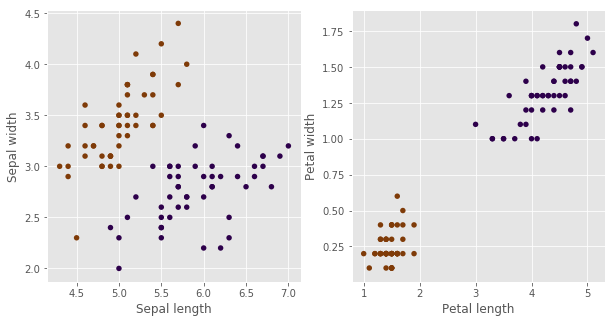

In [3]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

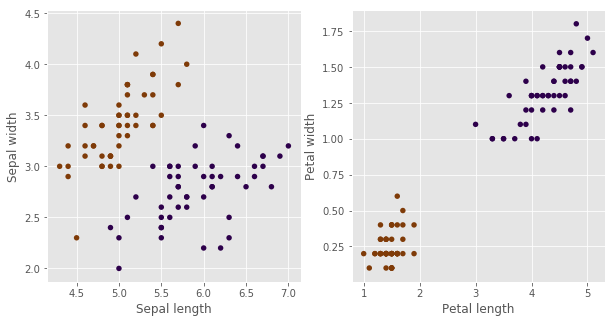

In [4]:
model = sc.DBSCAN(eps=0.7, min_samples=3)

y_sklearn = model.fit_predict(x_iris)

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_sklearn, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_sklearn, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

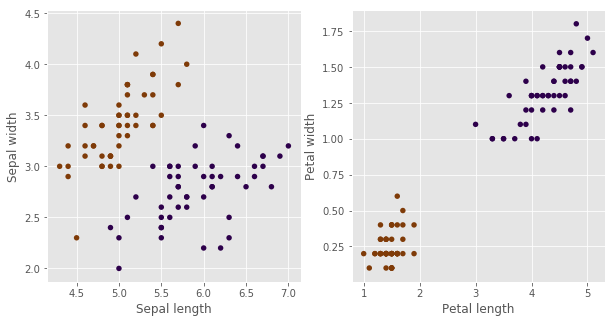

In [6]:
model = Clustering(0.7,3)

pred_iris = model.fit_predict(x_iris)

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [7]:
pred_iris = Clustering().fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Silhouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

Далее описаны два критерия качества: средний радиус и Silhoutte

In [8]:
## Задание 2
# Реализация критерия, использующего радиус (не применяется далее)
def my_dist(p,q):
    return np.linalg.norm(p-q)
    
def get_radius(X,y,centroids):
    '''
    Create dictionary {cluster_id: max_radius}
    '''
    rads = dict()
    labels = np.array(y)
    for i in centroids.keys():
        ith_label_points = X[labels == i]
        p = centroids[i]
        max_rad = max([my_dist(p,q) for q in ith_label_points])
        rads[i] = max_rad
    return rads

def get_centroids(X,y):
    '''
    Create dictionary {cluster_id: centroid coordinates}
    '''
    clusters = set(y) # create set of clusters' ids
    labels = np.array(y)
    centroids = dict()
    for i in clusters:
        ith_label_points = X[labels == i]
        tmp = np.zeros((1,X.shape[1]))
        for point in ith_label_points:
            tmp += point
        tmp /= len(ith_label_points)
        centroids[i] = tmp
    return centroids
    
        
def quality(X, y):
    """
    Implement radius quality criterion of your choice
    """
    centroids = get_centroids(X,y)
    rads = get_radius(X,y,centroids)
    qlt = np.sum(rads.values()) / len(rads)
    return qlt

### Silhouette

Реализация критерия silhoutte $a(x)$ - расстояние от x до центроида собственного кластера, $b(x)$ - минимум из расстояний до центройдов других кластеров $SC(x) = \frac{a(x)+b(x)}{\max\left(a(x),b(x)\right)}$

In [9]:


def my_dist(p,q):
    return np.linalg.norm(p-q)
    
def get_silhoutte_coefs(X, y, centroids):
    '''
    Create list of coefficients for each point in X
    '''
    labels = np.array(y)
    sc = []
    for idx, point in enumerate(X):
        cluster = int(y[idx])
        a = my_dist(point, centroids[cluster])
        b = min([my_dist(point, q) for key, q in centroids.items() if key != cluster])    
        sc.append((b-a)/max(a,b))
    return sc

def get_centroids(X,y):
    '''
    Create dictionary {cluster_id: centroid coordinates}
    '''
    clusters = set(y) # create set of clusters' ids
    labels = np.array(y)
    centroids = dict()
    for i in clusters:
        ith_label_points = X[labels == i]
        tmp = np.zeros((1,X.shape[1]))
        for point in ith_label_points:
            tmp += point
        tmp /= len(ith_label_points)
        centroids[i] = tmp
    return centroids
    
        
def quality(X, y):
    """
    Implement silhoutte quality criterion of your choice
    
        returns: list of SilCoefficients and average coeff
    """
    
    # Of there's only one cluster raising ValueError as sklearn.metrics.silhouette_score do
    if len(set(y)) == 1:
        raise ValueError("Number of labels is %d. Valid values are 2 "
                       "to n_samples - 1 (inclusive)" % len(set(y)))
    centroids = get_centroids(X,y)
    sil_coef = get_silhoutte_coefs(X,y,centroids)
    sil_avg = sum(sil_coef) / len(sil_coef)
    return sil_coef, sil_avg

Следующая функция позволяет изобразить график Silhoutte

In [10]:
import matplotlib.cm as cm

def plot_silhouette(X,y,sil_coef,sil_avg):
    clusters = set(y)
    sample_silhouette_values = np.array(sil_coef)
    cluster_labels = np.array(y)
    fig, ax1, = plt.subplots(1, 1)
    fig.set_size_inches(10, 10)
    ax1.set_xlim([-1, 1])
    y_lower = 10
    for i in clusters:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / len(clusters))
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=sil_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])


Нарисуем Silhoutte для какой-то конкретной кластеризации данных. Красным пунктиром изображено среднее значение (криетрий качества) Silhoutte на всех элементах выборки. Значения близкие к единице показывают, что объекты кластеризованы хорошо, близкие к нулю -- означает, что объекты на пограничном уровне правильности отнесения к кластеру. Отричцательные же значения говорят о неправильном отнесении к кластеру.
Примечание: нулевым кластеорм в реализации всегда обозначается шум, по этому поведение его силуэта может быть неоднозначно

Silhoutte average is 0.811780:


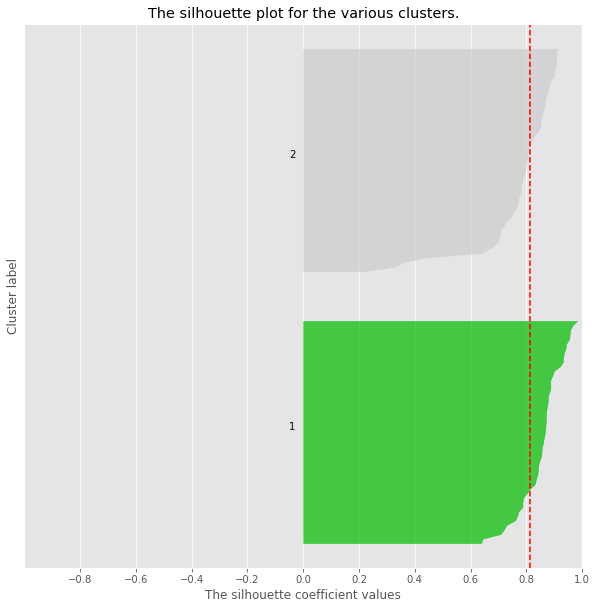

In [12]:
model = Clustering(0.7,4)
pred_iris = model.fit_predict(x_iris)

sil_coef,sil_avg = quality(x_iris, pred_iris)
plot_silhouette(x_iris, pred_iris,sil_coef,sil_avg)
print("Silhoutte average is %f:" % sil_avg)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

Как отмечалось ранее, чем ближе Silhoutte score к единице, тем качетсвеннее кластеризация. Это мы можем увидеть на графиках, построенных в этой ячейке

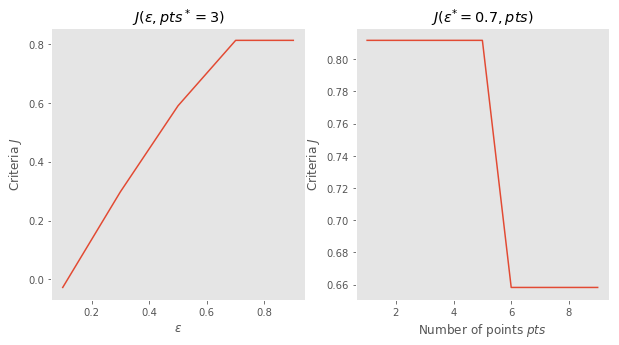

In [13]:
epsilons = np.arange(0.1, 1.0, 0.2)
min_points = range(1, 10)

criteria_eps = np.zeros(len(epsilons))
criteria_pts = np.zeros(len(min_points))

iris = ds.load_iris()
X = iris.data[:100]

# For iris dataset have found that parameters (eps=0.7, min_pts=3) give the best clustering (visual criteria)
# so let us show two plots with quality() of two eps and min_pts where one is fixed and the other varies



min_pts = 3
for i, eps in enumerate(epsilons):
    cls = Clustering(eps, min_pts)
    y = cls.fit_predict(X)
    _, criteria_eps[i] = quality(X, y)

epsilon = 0.7
for i, pts in enumerate(min_points):
    cls = Clustering(epsilon, pts)
    y = cls.fit_predict(X)
    _, criteria_pts[i] = quality(X, y) 
    
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.plot(epsilons, criteria_eps)
pl.title("$J(\epsilon, pts^* = 3)$")
pl.ylabel("Criteria $J$")
pl.xlabel("$\epsilon$")
pl.grid()

pl.subplot(1, 2, 2)
pl.plot(min_points, criteria_pts)
pl.title("$J(\epsilon^{*} = 0.7, pts)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of points $pts$")
pl.grid()

pl.show()

In [15]:
## Задание 3
# Read data from file
data = pd.DataFrame.from_csv('./WDI_csv/WDIData.csv')
data.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [16]:
# Find are there columns full of nans?
labels = list(data)
for label in labels:
    if pd.isnull(data[label]).all():
        print(label)

Unnamed: 61


In [17]:
# Define a function that takes from the data the slice we want
def extract_table(df, year, indicators, method=None):
    year = str(year)
    if isinstance(indicators, str):
        indicators = [indicators]
    df_slice_year = df[['Country Code','Indicator Code',year]]
    df_slice_indicators = df_slice_year[df_slice_year['Indicator Code'].isin(indicators)]
    
    # Create more appropriate appearance of table
    new_df = df_slice_indicators.pivot_table(values=year, index='Country Code', columns=['Indicator Code'])
    
    # If whole row is nan then drop it
    new_df.dropna(how='all', inplace=True)
    
    # Fill nan in column with mean of that column
    if method == 'fillna':
        new_df.fillna(new_df.mean(), inplace=True)
    elif  method == 'dropna':
        new_df.dropna(how='any', inplace=True)  
    
    return new_df

In [18]:
year = '2010'
indicator = [ 'AG.LND.FRST.K2', 'AG.LND.TOTL.RU.K2', 'AG.PRD.CREL.MT']

new_df = extract_table(data, year, indicator, method='fillna')
new_df.head()

Indicator Code,AG.LND.FRST.K2,AG.LND.TOTL.RU.K2,AG.PRD.CREL.MT
Country Code,,,
ABW,4.2,9.008322e+00,1.077119e+08
AFG,13500.0,5.057469e+06,5.957000e+06
AGO,584800.0,1.248199e+06,1.181944e+06
ALB,7763.0,2.668671e+04,6.938000e+05
AND,160.0,5.057469e+06,1.077119e+08


In [19]:
x = new_df.values
means,stds = x.mean(axis=0), x.std(axis=0)
x = (x - means)/stds

model = Clustering(0.4,3)

y = model.fit_predict(x)

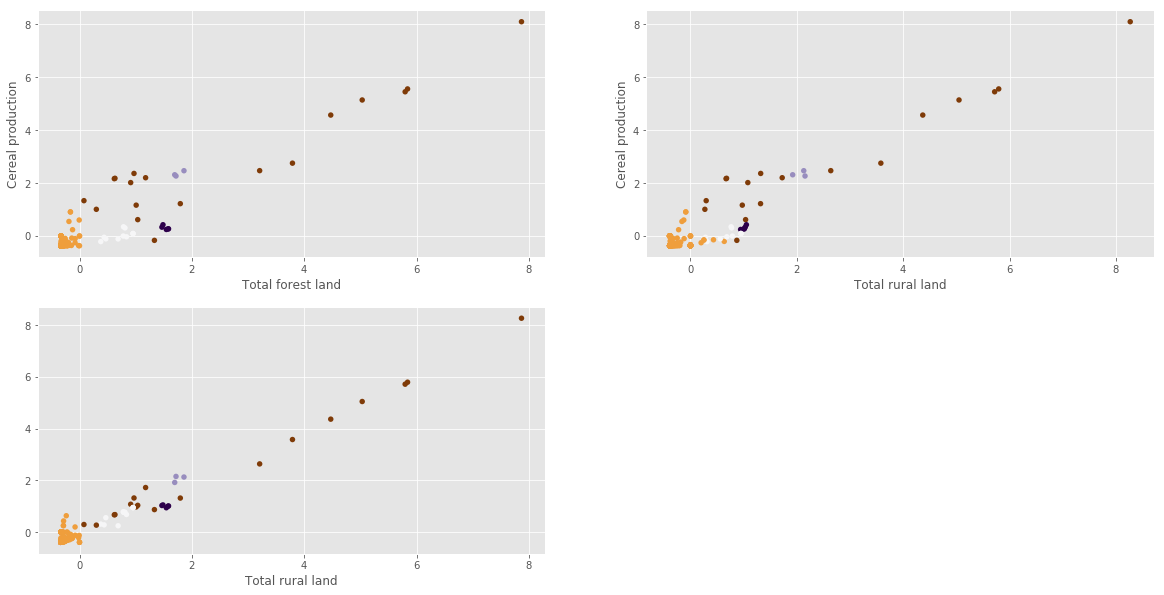

In [20]:

pl.figure(figsize=(20, 10))

pl.subplot(2,2,1)
pl.scatter(x[:, 0], x[:, 2], c=y, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Total forest land')
plt.ylabel('Cereal production')

pl.subplot(2,2,2)
pl.scatter(x[:, 1], x[:, 2], c=y, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Total rural land')
plt.ylabel('Cereal production')

pl.subplot(2,2,3)
pl.scatter(x[:, 0], x[:, 1], c=y, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Total forest land')
plt.xlabel('Total rural land')


pl.show()

Кластеризация стран по значениям на 2010 год проведена по четырем признакам:  площадь леса в стране, площадь сельской местности и производство круп. 
На всех графиках наблюдается линейная состовляющая в зависимости признаков. Но кроме этого кластеризация с выбранными параметрами показывает, что существуют похожие по этим параметрам страны.

В основной кластер попали страны со средним (близким к нулю после нормировки) размером площади леса и сельской местности. Далекие от этого кластера значения попали в кластер "шум"


Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.